## In this version, I will test my own predictions to make sure 'Schiller' and 'Hinselmann' are the most two important factors we need to feed our model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Clean Data_2.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),...,STDs:HIV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
2,2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,...,0.0,0,1,0,1,0,0,0,0,0
4,4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,...,0.0,0,0,0,0,0,0,0,0,0


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Biopsy',axis=1)
y = df['Biopsy']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Building Decision Tree model before implementing Feature Selection

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
model = DecisionTreeClassifier()

In [10]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
predictions = model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9575971731448764


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       263
           1       0.72      0.65      0.68        20

    accuracy                           0.96       283
   macro avg       0.85      0.82      0.83       283
weighted avg       0.96      0.96      0.96       283



[[258   5]
 [  7  13]]


## Building Decision Tree model after implementing Feature Selection

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [14]:
X.shape

(856, 23)

In [15]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_

array([0.07035426, 0.05643063, 0.07190693, 0.04463765, 0.00781525,
       0.01350322, 0.01564658, 0.01837898, 0.06244913, 0.01243233,
       0.01737513, 0.00725626, 0.00733877, 0.00958832, 0.00749184,
       0.00926585, 0.00768552, 0.00941297, 0.00828752, 0.00910026,
       0.12990617, 0.35943259, 0.04430384])

In [16]:
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)

In [17]:
feat_importances

Age                                0.070354
Number of sexual partners          0.056431
First sexual intercourse           0.071907
Num of pregnancies                 0.044638
Smokes                             0.007815
Smokes (years)                     0.013503
Smokes (packs/year)                0.015647
Hormonal Contraceptives            0.018379
Hormonal Contraceptives (years)    0.062449
IUD                                0.012432
IUD (years)                        0.017375
STDs                               0.007256
STDs:condylomatosis                0.007339
STDs:syphilis                      0.009588
STDs:HIV                           0.007492
STDs: Number of diagnosis          0.009266
Dx:Cancer                          0.007686
Dx:CIN                             0.009413
Dx:HPV                             0.008288
Dx                                 0.009100
Hinselmann                         0.129906
Schiller                           0.359433
Citology                        

<AxesSubplot:>

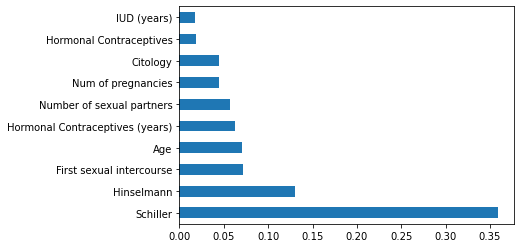

In [18]:
feat_importances.nlargest(10).plot(kind='barh')

In [19]:
model = SelectFromModel(clf, prefit=True)

In [20]:
X_new = model.transform(X)

In [21]:
X_new.shape

(856, 8)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=101)

In [23]:
new_model = DecisionTreeClassifier()

In [24]:
new_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
predictions = new_model.predict(X_test)

In [26]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9611307420494699


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       263
           1       0.76      0.65      0.70        20

    accuracy                           0.96       283
   macro avg       0.87      0.82      0.84       283
weighted avg       0.96      0.96      0.96       283



[[259   4]
 [  7  13]]


In [27]:
X_new

array([[18.,  4., 15., ...,  0.,  0.,  0.],
       [15.,  1., 14., ...,  0.,  0.,  0.],
       [34.,  1., 17., ...,  0.,  0.,  0.],
       ...,
       [25.,  2., 17., ...,  0.,  0.,  1.],
       [33.,  2., 24., ...,  0.,  0.,  0.],
       [29.,  2., 20., ...,  0.,  0.,  0.]])

In [28]:
selected_feature = pd.DataFrame(X_new)

In [29]:
selected_feature

,0,1,2,3,4,5,6,7
0,18.0,4.0,15.0,1.0,0.00,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.00,0.0,0.0,0.0
2,34.0,1.0,17.0,1.0,0.00,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,3.00,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,15.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
851,34.0,3.0,18.0,0.0,0.00,0.0,0.0,0.0
852,32.0,2.0,19.0,1.0,8.00,0.0,0.0,0.0
853,25.0,2.0,17.0,0.0,0.08,0.0,0.0,1.0
854,33.0,2.0,24.0,2.0,0.08,0.0,0.0,0.0


## Univariate feature selection

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [31]:
bestfeatures = SelectKBest(score_func=chi2, k=10)

In [32]:
fit = bestfeatures.fit(X,y)

In [33]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [34]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [35]:
featureScores.columns = ['Specs','Score']

In [36]:
print(featureScores.sort_values(ascending=False,by='Score'))

                              Specs       Score
21                         Schiller  420.338313
20                       Hinselmann  245.975404
22                         Citology   87.023526
5                    Smokes (years)   44.465395
8   Hormonal Contraceptives (years)   26.425415
18                           Dx:HPV   21.676586
16                        Dx:Cancer   21.676586
19                               Dx   20.644255
10                      IUD (years)   16.726887
14                         STDs:HIV   13.649731
17                           Dx:CIN   10.838293
11                             STDs   10.093634
15        STDs: Number of diagnosis    8.766596
0                               Age    7.105021
12              STDs:condylomatosis    6.944348
6               Smokes (packs/year)    5.956898
9                               IUD    4.515031
13                    STDs:syphilis    1.304619
3                Num of pregnancies    1.184499
4                            Smokes    0

Text(0, 0.5, 'Accuracy Score')

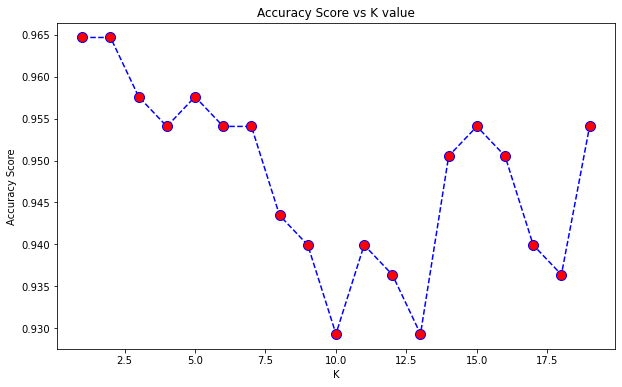

In [37]:
accuracy = []
for i in range(1,20):
    X_new = SelectKBest(chi2, k=i).fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=101)
    new_model = DecisionTreeClassifier()
    new_model.fit(X_train,y_train)
    predictions = new_model.predict(X_test)
    accuracy.append(accuracy_score(y_test,predictions))
plt.figure(figsize=(10,6))
plt.plot(range(1,20),accuracy,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy Score vs K value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

In [38]:
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

In [39]:
X_new.shape

(856, 2)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=101)
new_model = DecisionTreeClassifier()
new_model.fit(X_train,y_train)
predictions = new_model.predict(X_test)

In [41]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.9646643109540636


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       263
           1       0.69      0.90      0.78        20

    accuracy                           0.96       283
   macro avg       0.84      0.93      0.88       283
weighted avg       0.97      0.96      0.97       283



[[255   8]
 [  2  18]]


In [42]:
X[['Hinselmann','Schiller']]

,Hinselmann,Schiller
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
851,0,0
852,0,0
853,0,0
854,0,0


In [43]:
X_new

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

# Testing Model

In [ ]:
import seaborn as sns

In [54]:
df[['Schiller','Hinselmann','Biopsy']].corr()

,Schiller,Hinselmann,Biopsy
Schiller,1.000000,0.650205,0.733156
Hinselmann,0.650205,1.000000,0.547362
Biopsy,0.733156,0.547362,1.000000


<AxesSubplot:>

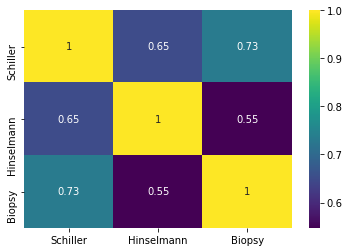

In [55]:
sns.heatmap(data=df[['Schiller','Hinselmann','Biopsy']].corr(),annot=True,cmap='viridis')

In [44]:
X = df[['Schiller','Hinselmann']]
y = df['Biopsy']

In [46]:
X.corr()

,Schiller,Hinselmann
Schiller,1.000000,0.650205
Hinselmann,0.650205,1.000000


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [48]:
testing_model = DecisionTreeClassifier()

In [49]:
testing_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
testing_predictions = testing_model.predict(X_test)

In [52]:
print('Accuracy Score:',accuracy_score(y_test,testing_predictions))
print('\n')
print(classification_report(y_test,testing_predictions))
print('\n')
print(confusion_matrix(y_test,testing_predictions))

Accuracy Score: 0.9646643109540636


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       263
           1       0.69      0.90      0.78        20

    accuracy                           0.96       283
   macro avg       0.84      0.93      0.88       283
weighted avg       0.97      0.96      0.97       283



[[255   8]
 [  2  18]]
